In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive
drive.mount('/content/drive')

traindata_path = '/content/drive/MyDrive/ddos/KDDTrain+.txt'
testdata_path = '/content/drive/MyDrive/ddos/KDDTest+.txt'

col_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome']

# Read CSV files using Pandas
traindata = pd.read_csv(traindata_path, header=None, names = col_names)
testdata = pd.read_csv(testdata_path, header=None, names = col_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
for i in ['protocol_type',"service","flag"]:
    traindata[i] = traindata[i].astype('category').cat.codes
    testdata[i] = testdata[i].astype('category').cat.codes

In [12]:
def lab(traindata):

    classlist = []

    check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
    check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
    check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
    check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")


    for item in traindata.pop('attack'):
        if item in check1:
            classlist.append("DoS")
        elif item in check2:
            classlist.append("Probe")
        elif item in check3:
            classlist.append("U2R")
        elif item in check4:
            classlist.append("R2L")
        else:
            classlist.append("ANormal")

    return classlist

In [13]:
y_train = np.array(lab(traindata))
y_test = np.array(lab(testdata))

In [14]:
unique_values = np.unique(y_train)
print(unique_values)

['ANormal' 'DoS' 'Probe' 'R2L' 'U2R']


In [15]:
def normalize(df, cols):
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [16]:
traindata = normalize(traindata,traindata.columns)
testdata = normalize(testdata,testdata.columns )
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000


In [17]:
trainX = pd.DataFrame(normalize(traindata,traindata.columns))
trainT = pd.DataFrame(normalize(testdata,testdata.columns))

In [18]:

rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=4)  # You can adjust the number of trees

# Fit the model on the training data
rf.fit(trainX, y_train)


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)

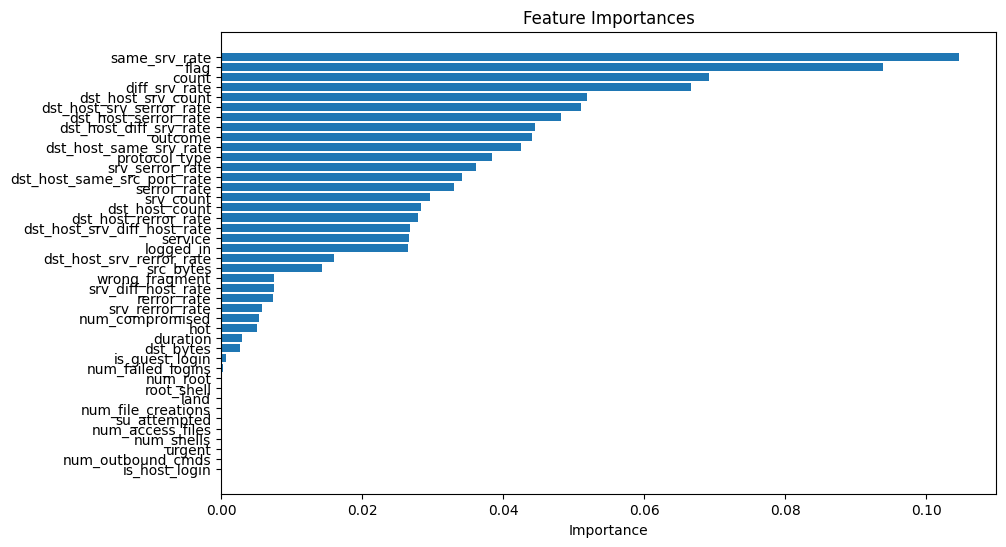

In [19]:

feature_importances = rf.feature_importances_

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [trainX.columns[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [20]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Selecting top 10 features
top_features = trainX.columns[indices]
top_featuresT = trainT.columns[indices]
# Create new train and test sets with only top 10 features
trainX_top10 = trainX[top_features]
trainT_top10 = trainT[top_featuresT]

# Print top 10 feature names and their importance scores
print("Top 10 feature names and their importance scores:")
for i in indices:
    print(f"{trainX.columns[i]}: {importances[i]}")

Top 10 feature names and their importance scores:
same_srv_rate: 0.10469882174800307
flag: 0.09391854512056973
count: 0.06920547506115221
diff_srv_rate: 0.06670106051192884
dst_host_srv_count: 0.051938747619151
dst_host_srv_serror_rate: 0.051019382352954744
dst_host_serror_rate: 0.048262278703510623
dst_host_diff_srv_rate: 0.04446790909293198
outcome: 0.04403602496624945
dst_host_same_srv_rate: 0.042499954633546125


In [21]:


# Define the model and parameters
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup the grid search
grid = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring='accuracy')
grid.fit(trainX_top10, y_train)

# Output the best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.9916093133556669


In [ ]:
#generate predictions and assign back their labels
class_names = ['Normal', 'Dos', 'Probe', 'R2L', 'U2R']
predictions = grid.predict(trainT_top10)


In [ ]:
# Generate a classification report
report = classification_report(y_test, predictions, target_names=class_names)
print(report)

              precision    recall  f1-score   support

      Normal       0.82      0.95      0.88      9889
         Dos       0.90      0.87      0.88      7460
       Probe       0.72      0.77      0.74      2421
         R2L       0.88      0.40      0.55      2707
         U2R       0.26      0.16      0.20        67

    accuracy                           0.84     22544
   macro avg       0.72      0.63      0.65     22544
weighted avg       0.84      0.84      0.82     22544



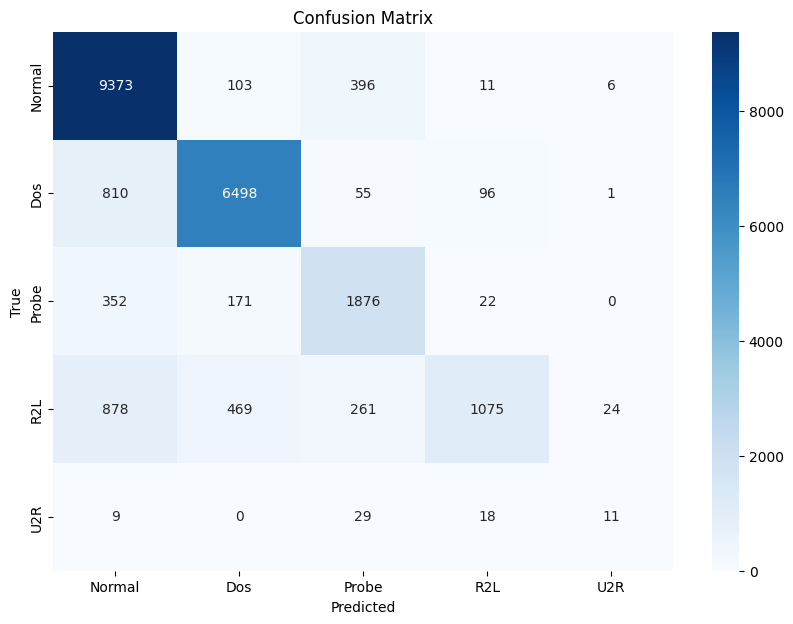

In [ ]:

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()